In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata

In [26]:
def process_df(df:pd.DataFrame):
    summ_df = df.copy()
    summ_df['Gene'] = summ_df['Gene'].apply(lambda x: x.split('_')[0]).values
    summ_df.sort_values(['Gene', 'Acc'], ascending=[True, False], inplace=True)
    summ_df.drop_duplicates('Gene', inplace=True)
    summ_df = summ_df.loc[~summ_df['Gene'].isin(['APOE', 'TOMM40', 'APOC1', 'BCAM'])]
    summ_df['-logP'] = -np.log10(summ_df['P'])
    summ_df['Rank'] = rankdata(summ_df['P'])
    return summ_df

In [31]:
metric = 'Acc'

## Sens 1.3

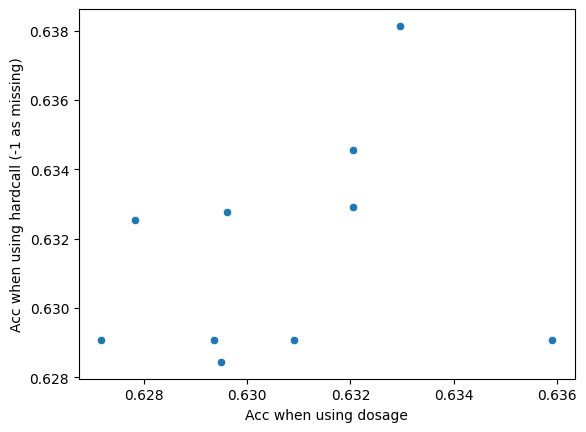

In [32]:
summ_df_new = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens1.3/MATERNAL_MARIONI_Sens1.3_summary.csv')
summ_df_new = process_df(summ_df_new)
summ_df_v1 = pd.read_csv('../../GWASOnSteroids/Results/Annotated_NoDup_MatAD_NN_GWAS.csv')
summ_df_v1 = process_df(summ_df_v1)
summ_df_v1.set_index('Gene', inplace=True, drop=False)
summ_df_v1 = summ_df_v1.loc[summ_df_new['Gene'].values]

x = summ_df_new[f'{metric}'].values
y = summ_df_v1[f'{metric}'].values
sns.scatterplot(x=x, y=y)
if metric == '-logP':
    plt.axvline(x=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
    plt.axhline(y=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
plt.xlabel(f'{metric} when using dosage')
plt.ylabel(f'{metric} when using hardcall (-1 as missing)')
plt.savefig(f'./results_Sens1.3/dosage_vs_hardcall_{metric}.png', dpi=100)

## Sens 1.4

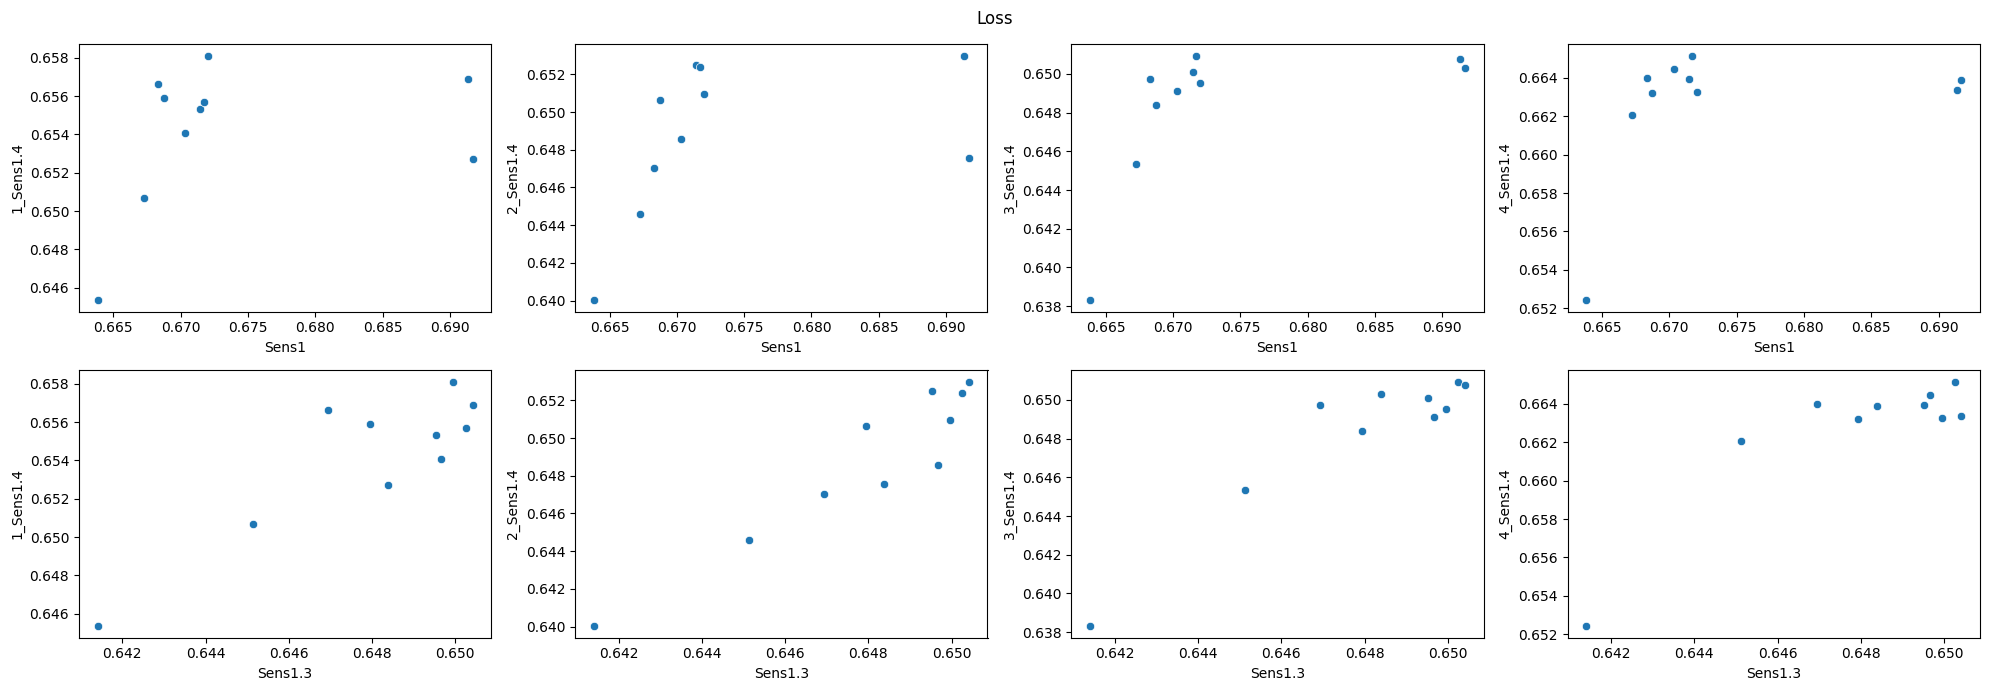

In [24]:
fig, ax = plt.subplots(2, 4, figsize=(20, 7))
ax = ax.flatten()
axi = 0
for sens in ['Sens1', 'Sens1.3']:
    for grouping in [1, 2, 3, 4]:
        summ_df_14 = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens1.4/{grouping}_MATERNAL_MARIONI_Sens1.4_summary.csv')
        summ_df_14 = process_df(summ_df_14)
        summ_df_1x = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_{sens}/MATERNAL_MARIONI_{sens}_summary.csv')
        summ_df_1x = process_df(summ_df_1x)
        summ_df_1x.set_index('Gene', inplace=True, drop=False)
        summ_df_1x = summ_df_1x.loc[summ_df_14['Gene']]

        x = summ_df_1x[f'{metric}'].values
        y = summ_df_14[f'{metric}'].values
        sns.scatterplot(x=x, y=y, ax=ax[axi])
        if metric == '-logP':
            ax[axi].axvline(x=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
            ax[axi].axhline(y=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
        ax[axi].set_xlabel(f'{sens}')
        ax[axi].set_ylabel(f'{grouping}_Sens1.4')
        
        axi += 1

fig.suptitle(metric)
fig.tight_layout()
fig.savefig(f'./results_Sens1.4/Sens1.4_vs_Sens1x_{metric}.png', dpi=100)


In [34]:
agg_summ_df = pd.DataFrame(columns=['Gene', 'Acc', '-logP', 'Rank', 'Grouping_id'])
for i in range(1, 5):
    for j in range(i+1, 5):
        dfi = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens1.4/{i}_MATERNAL_MARIONI_Sens1.4_summary.csv')
        dfi = process_df(dfi)
        dfj = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens1.4/{j}_MATERNAL_MARIONI_Sens1.4_summary.csv')
        dfj = process_df(dfj)
        
        x = dfi[f'{metric}'].values
        y = dfj[f'{metric}'].values

        sns.scatterplot(x=x, y=y)
        if metric == '-logP':
            plt.axvline(x=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
            plt.axhline(y=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
        plt.savefig(f'./results_Sens1.4/effect_of_diff_grouping/{i}vs{j}_{metric}.png', dpi=100)
        plt.close()



         Gene  Chrom  Type  SNPs  Epoch       Acc      Loss            Time  \
28   ARHGEF28      5   NaN    50     95  0.615650  0.655325  0:09:06.615414   
25       ARSG     17   NaN    50    243  0.616033  0.655879  0:09:03.628814   
27     ATP2C1      3   NaN    50     72  0.617309  0.654079  0:09:04.727372   
9      GEMIN7     19   NaN    50    159  0.624840  0.650659  0:06:41.068397   
59      GLIS3      9   NaN    50    129  0.616288  0.658086  0:09:03.004009   
65      ICAM3     19   NaN    41    114  0.618075  0.652708  0:09:02.639010   
107      NFIA      1   NaN    50     89  0.615777  0.655667  0:07:13.123437   
10    PPP1R37     19   NaN    50    144  0.629436  0.645377  0:06:40.951062   
96      SMAD9     13   NaN    50     78  0.613735  0.656637  0:07:01.397708   
111    SNRPB2     20   NaN    50    167  0.613607  0.656878  0:07:19.370608   

                P      -logP  Rank  
28   1.075265e-02   1.968484   8.0  
25   6.176864e-03   2.209232   6.0  
27   7.184165e-04  

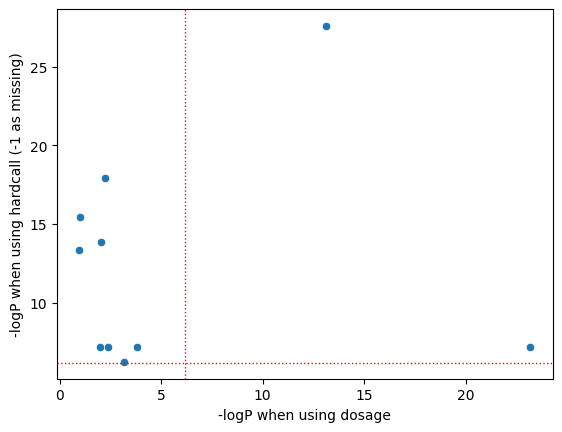

In [21]:
summ_df_new = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens1.4/1_MATERNAL_MARIONI_Sens1.4_summary.csv')
summ_df_new = process_df(summ_df_new)
summ_df_v1 = pd.read_csv('../../GWASOnSteroids/Results/Annotated_NoDup_MatAD_NN_GWAS.csv')
summ_df_v1 = process_df(summ_df_v1)
summ_df_v1.set_index('Gene', inplace=True, drop=False)
summ_df_v1 = summ_df_v1.loc[summ_df_new['Gene'].values]

x = summ_df_new[f'{metric}'].values
y = summ_df_v1[f'{metric}'].values
sns.scatterplot(x=x, y=y)
if metric == '-logP':
    plt.axvline(x=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
    plt.axhline(y=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
plt.xlabel(f'{metric} when using dosage')
plt.ylabel(f'{metric} when using hardcall (-1 as missing)')
plt.savefig(f'./results_Sens1.4/effect_of_dose/dosage_vs_hardcall_{metric}.png', dpi=100)